# Optimization of Squared Loss

In statistics and machine learning, **Squared Loss** (also known as $L_2$ loss) is one of the most common loss functions used to measure the discrepancy between predicted values and actual observations. Optimizing this loss function is the foundation of Linear Regression and many other predictive models.

## 1. Theory: What is Squared Loss?

Suppose we have a set of $n$ observations $y_1, y_2, ..., y_n$. We want to find a single value $w$ (a parameter) that "best" represents these observations.

The **Squared Loss** for a single observation $y_i$ and a prediction $w$ is defined as:
$$L(y_i, w) = (y_i - w)^2$$

The **Total Squared Loss** (or Sum of Squared Errors, SSE) for the entire dataset is:
$$J(w) = \sum_{i=1}^{n} (y_i - w)^2$$

### Why Squared Loss?
1. **Differentiability**: The function is smooth and differentiable everywhere, making it easy to optimize using calculus.
2. **Convexity**: $J(w)$ is a quadratic function (a parabola opening upwards), which means it has a single global minimum.
3. **Sensitivity**: Squaring the errors penalizes larger outliers more heavily than smaller ones.

---

## 2. Optimization: Finding the Minimum

To find the value of $w$ that minimizes $J(w)$, we use calculus. We take the derivative of $J(w)$ with respect to $w$ and set it to zero.

### Step 1: Differentiate $J(w)$
Using the Power Rule and Chain Rule:
$$\frac{d}{dw} J(w) = \frac{d}{dw} \sum_{i=1}^{n} (y_i - w)^2$$
$$\frac{d}{dw} J(w) = \sum_{i=1}^{n} 2(y_i - w) \cdot (-1)$$
$$\frac{d}{dw} J(w) = -2 \sum_{i=1}^{n} (y_i - w)$$

### Step 2: Set the derivative to zero
$$-2 \sum_{i=1}^{n} (y_i - w) = 0$$
$$\sum_{i=1}^{n} (y_i - w) = 0$$

### Step 3: Solve for $w$
$$\sum_{i=1}^{n} y_i - \sum_{i=1}^{n} w = 0$$
$$\sum_{i=1}^{n} y_i - n w = 0$$
$$n w = \sum_{i=1}^{n} y_i$$
$$w = \frac{1}{n} \sum_{i=1}^{n} y_i$$

**Conclusion:** The value that minimizes the squared loss is the **Arithmetic Mean** of the observations!


## 3. Python Implementation and Illustration

Let's visualize how the squared loss changes as we vary $w$ and verify that the minimum occurs at the mean.


Data points: [10 12 15 20 25]
Arithmetic Mean: 16.4


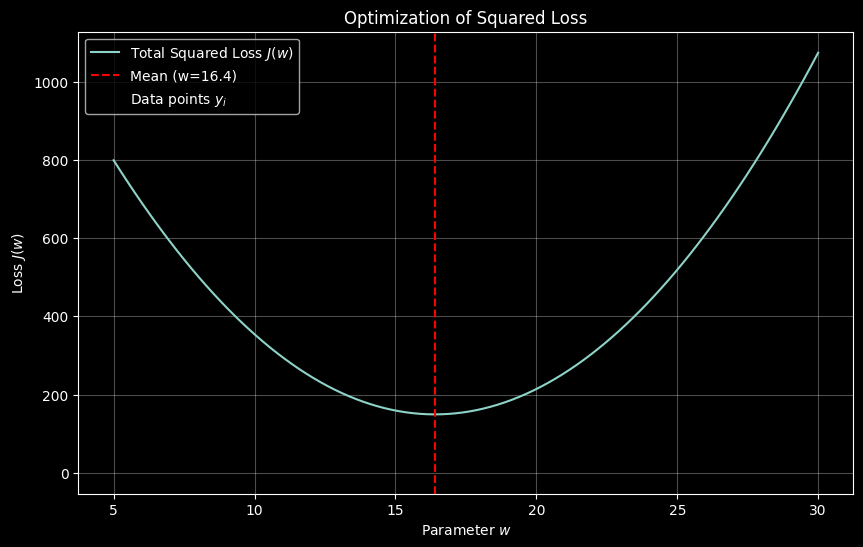

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some random data
np.random.seed(42)
y = np.array([10, 12, 15, 20, 25])
mean_y = np.mean(y)

print(f"Data points: {y}")
print(f"Arithmetic Mean: {mean_y}")

# 2. Define the Total Squared Loss function
def total_squared_loss(w, observations):
    return np.sum((observations - w)**2)

# 3. Calculate loss for a range of w values
w_range = np.linspace(min(y) - 5, max(y) + 5, 100)
losses = [total_squared_loss(w, y) for w in w_range]

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(w_range, losses, label='Total Squared Loss $J(w)$')
plt.axvline(mean_y, color='red', linestyle='--', label=f'Mean (w={mean_y})')
plt.scatter(y, np.zeros_like(y), color='black', marker='x', label='Data points $y_i$')

plt.title('Optimization of Squared Loss')
plt.xlabel('Parameter $w$')
plt.ylabel('Loss $J(w)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Symbolic Verification with SymPy

We can also use `SymPy` to perform the symbolic differentiation we did in the theory section.


In [2]:
from sympy import symbols, Sum, IndexedBase, Idx, solve
from IPython.display import display

n = symbols('n', integer=True)
i = symbols('i', cls=Idx)
y_i = IndexedBase('y')
w = symbols('w')

# Define the Sum of Squared Errors
sse = Sum((y_i[i] - w)**2, (i, 1, n))
print("Cost Function J(w):")
display(sse)

# Differentiate with respect to w
derivative = sse.diff(w)
print("\nDerivative dJ/dw:")
display(derivative)

# Explanation of the solve step
print("\nSetting derivative to 0 and solving for w:")
print("-2 * Sum(y_i - w) = 0")
print("Sum(y_i) - n*w = 0")
print("w = Sum(y_i) / n")


Cost Function J(w):


Sum((-w + y[i])**2, (i, 1, n))


Derivative dJ/dw:


Sum(2*w - 2*y[i], (i, 1, n))


Setting derivative to 0 and solving for w:
-2 * Sum(y_i - w) = 0
Sum(y_i) - n*w = 0
w = Sum(y_i) / n


## 4. Key Takeaway

The squared loss function is minimized by the **mean**. This is why the mean is such a fundamental measure of central tendency in statistics—it is the "best fit" value that minimizes the sum of squared distances to all points in a dataset.
